# (1) Simple Linear Regression - Delivery Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.shape

(21, 2)

In [4]:
df = df.rename({'Delivery Time': 'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)
df.head(1)

,Delivery_Time,Sorting_Time
0,21.0,10


**Ploting the Delivery Time vs Sorting Time**

<function matplotlib.pyplot.show(close=None, block=None)>

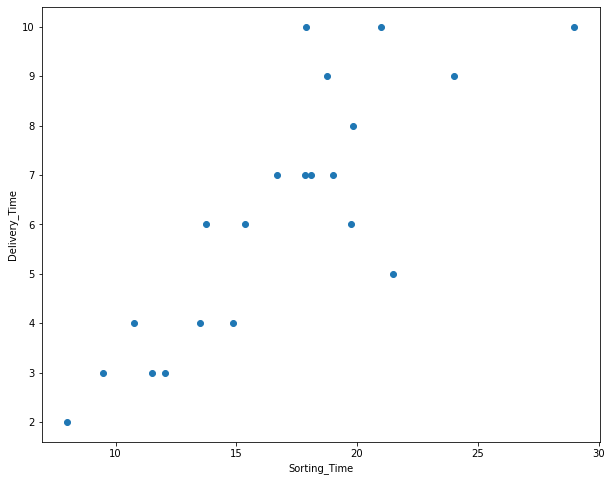

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(df.Delivery_Time, df.Sorting_Time)
plt.ylabel('Delivery_Time')
plt.xlabel('Sorting_Time')
plt.show

In [6]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Creating Linear Regression Model

In [7]:
model = LinearRegression()
Y = df['Delivery_Time'].values.reshape(21,1)
X = df['Sorting_Time'].values.reshape(21,1)
reg_ = model.fit(X,Y)

In [8]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [9]:
Y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [10]:
print(reg_.coef_)
print(reg_.intercept_)

[[1.6490199]]
[6.58273397]


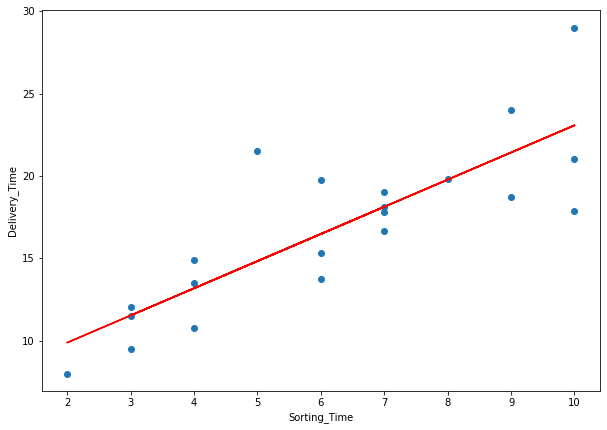

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(df.Sorting_Time, df.Delivery_Time)
plt.plot(df.Sorting_Time, df.Sorting_Time*reg_.coef_[0]+reg_.intercept_, color = 'red')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

## Model Validation

In [12]:
pred_trian_lm = reg_.predict(X)
r2_score(df['Delivery_Time'], pred_trian_lm)

0.6822714748417231

## Model with StatsModel

In [13]:
import statsmodels.formula.api as smf
import sklearn

In [14]:
model = smf.ols('Delivery_Time~Sorting_Time', data = df).fit()

In [15]:
pred_statsmodel = model.predict(df["Sorting_Time"])

In [16]:
r2_score(df['Delivery_Time'], pred_statsmodel)

0.6822714748417231

In [17]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        18:25:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)', data = df).fit()

In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        18:25:48   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 22 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                           18:25:48   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df['Sorting_Time^2'] = df.Sorting_Time**2
model_quadratic = smf.ols('np.log(Delivery_Time)~Sorting_Time+Sorting_Time^2', data=df).fit()

In [23]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.733
Model:                               OLS   Adj. R-squared:                  0.703
Method:                    Least Squares   F-statistic:                     24.68
Date:                   Tue, 22 Feb 2022   Prob (F-statistic):           6.96e-06
Time:                           18:25:48   Log-Likelihood:                 8.6150
No. Observations:                     21   AIC:                            -11.23
Df Residuals:                         18   BIC:                            -8.096
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1360      0.102     20.851      0.000       1.921       2.351
Sorting_Time         0.0815      0.025      3.254      0.004       0.029       0.134
Sorting_Time ^ 2     0.0243      0.020      1.211      0.241      -0.018       0.066
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.386
Skew:                           0.245   Prob(JB):                        0.825
Kurtosis:                       2.552   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [24]:
Delivery_Time = ( 6.582734)+(1.649020)*6
Delivery_Time

16.476854

**Predictions for Multiple Values**

In [25]:
new_data = pd.Series([2,3.5,4,7,7.6,8])
new_data

0    2.0
1    3.5
2    4.0
3    7.0
4    7.6
5    8.0
dtype: float64

In [26]:
data_pred = pd.DataFrame(new_data, columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,2.0
1,3.5
2,4.0
3,7.0
4,7.6
5,8.0


In [27]:
model.predict(data_pred)

0     9.880774
1    12.354304
2    13.178814
3    18.125873
4    19.115285
5    19.774893
dtype: float64

# (2) Simple Linear Regression - Salary

In [28]:
salary_hike = pd.read_csv('./Salary_Data.csv')
salary_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
salary_hike.shape

(30, 2)

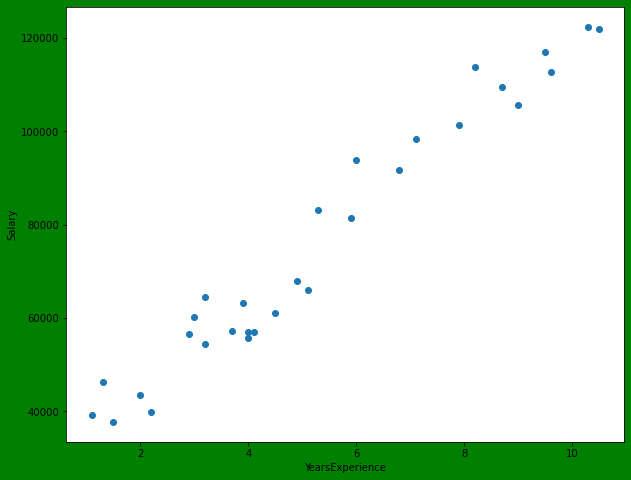

In [30]:
plt.figure(figsize=(10,8),facecolor='green')
plt.scatter(salary_hike.YearsExperience,salary_hike.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [31]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model Building

In [32]:
model_salary  = LinearRegression()

In [33]:
X = salary_hike['YearsExperience'].values.reshape(30,1)
Y = salary_hike['Salary'].values.reshape(30,1)

In [34]:
reg_salary = model_salary.fit(X,Y)

In [35]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [36]:
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [37]:
print(reg_salary.coef_)
print(reg_salary.intercept_)

[[9449.96232146]]
[25792.20019867]


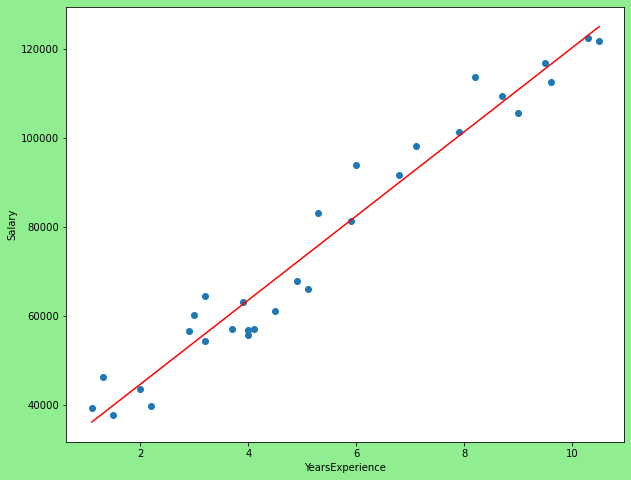

In [38]:
plt.figure(figsize=(10,8),facecolor='lightgreen')
plt.scatter(salary_hike.YearsExperience,salary_hike.Salary)
plt.plot(salary_hike.YearsExperience,salary_hike.YearsExperience*reg_salary.coef_[0]+reg_salary.intercept_,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Model Validation 

In [39]:
pred_trian_lm = reg_salary.predict(X)
r2_score(salary_hike['Salary'],pred_trian_lm)

0.9569566641435086

# Model with StatsModel

In [40]:
model = smf.ols('YearsExperience~Salary', data= salary_hike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        18:25:51   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model2 = smf.ols('YearsExperience~np.log(Salary)', data= salary_hike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        18:25:51   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model = smf.ols('np.log(YearsExperience)~Salary', data= salary_hike).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Tue, 22 Feb 2022   Prob (F-statistic):           3.25e-13
Time:                             18:25:51   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
salary_hike["YearsExperience_Sq"] = salary_hike.YearsExperience**2
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=salary_hike).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           3.95e-18
Time:                        18:25:51   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [44]:
Salary = (9449.96232146)*5+25792.20019867
Salary

73042.01180597

In [45]:
new_data = pd.Series([1,1.5,2.7,3.9,9.1,12])
new_data

0     1.0
1     1.5
2     2.7
3     3.9
4     9.1
5    12.0
dtype: float64

In [46]:
data_pred = pd.DataFrame(new_data, columns=['YearsExperience'])
data_pred

,YearsExperience
0,1.0
1,1.5
2,2.7
3,3.9
4,9.1
5,12.0


In [47]:
model_salary.predict(data_pred)

C:\Users\anand\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 35242.16252012],
       [ 39967.14368085],
       [ 51307.0984666 ],
       [ 62647.05325234],
       [111786.85732391],
       [139191.74805613]])